In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
spam_df = pd.read_csv("C:/Users/sydne/Desktop/jupiter/spam_or_not_spam.csv")
spam_df.head(10)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
5,i just had to jump in here as carbonara is on...,0
6,the scotsman NUMBER august NUMBER playboy want...,0
7,martin adamson wrote isn t it just basically a...,0
8,the scotsman thu NUMBER aug NUMBER meaningful ...,0
9,i have been trying to research via sa mirrors ...,0


In [3]:
spam_df.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [4]:
spam_df.groupby('label').describe()

email                                                               
      count unique                                                top freq
label                                                                     
0      2500   2445                     url URL date not supplied URL    10
1       499    427  lowest rates available for term life insurance...    5

In [5]:
spam_df['email'].isnull().sum()

1

In [6]:
spam_df= spam_df.dropna(how='any',axis=0)
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2999
Data columns (total 2 columns):
email    2999 non-null object
label    2999 non-null int64
dtypes: int64(1), object(1)
memory usage: 70.3+ KB


In [7]:
spam_df['length'] = spam_df['email'].apply(len)
spam_df.head()

,email,label,length
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522
1,martin a posted tassos papadopoulos the greek ...,0,643
2,man threatens explosion in moscow thursday aug...,0,1509
3,klez the virus that won t die already the most...,0,1015
4,in adding cream to spaghetti carbonara which ...,0,771


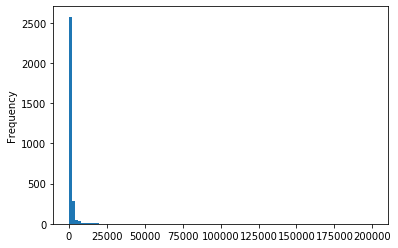

In [8]:
spam_df['length'] = spam_df['email'].apply(len)
spam_df.head()
spam_df['length'].plot(bins=100, kind='hist') 

In [9]:
spam_df.length.describe()

count      2999.000000
mean       1413.371457
std        4918.720757
min           1.000000
25%         387.000000
50%         756.000000
75%        1348.500000
max      200408.000000
Name: length, dtype: float64

In [10]:
# Let's see the longest message 43952
spam_df[spam_df['length'] == 30]['email'].iloc[0]

'url URL date not supplied URL '

In [11]:
notspam = spam_df[spam_df['label']==0]
spam = spam_df[spam_df['label']==1]

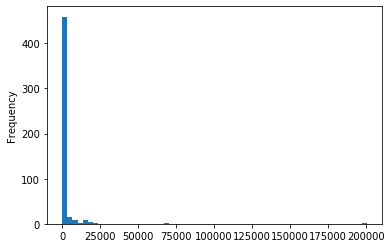

In [12]:
spam['length'].plot(bins=60, kind='hist') 

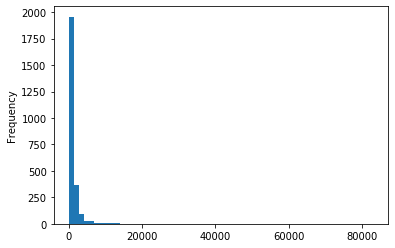

In [13]:
notspam['length'].plot(bins=60, kind='hist') 

In [14]:
print( 'Spam percentage =', (len(spam) / len(spam_df) )*100,"%")
print( 'Notspam percentage =', (len(notspam) / len(spam_df) )*100,"%")

Spam percentage = 16.63887962654218 %
Notspam percentage = 83.36112037345782 %


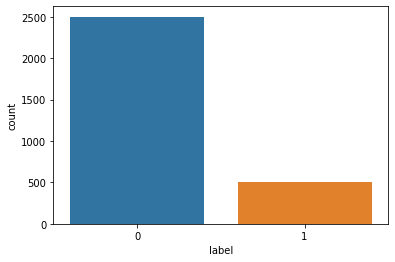

In [15]:
sns.countplot(spam_df['label'], label = "Count") 

In [16]:
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [17]:
spam_df_clean = spam_df['email'].apply(message_cleaning)

In [18]:
print(spam_df_clean[0])

['date', 'wed', 'NUMBER', 'aug', 'NUMBER', 'NUMBER', 'NUMBER', 'NUMBER', 'NUMBER', 'chris', 'garrigues', 'cwg', 'dated', 'NUMBER', 'NUMBERfaNUMBERd', 'deepeddy', 'com', 'message', 'id', 'NUMBER', 'NUMBER', 'tmda', 'deepeddy', 'vircio', 'com', 'reproduce', 'error', 'repeatable', 'like', 'every', 'time', 'without', 'fail', 'debug', 'log', 'pick', 'happening', 'NUMBER', 'NUMBER', 'NUMBER', 'pickit', 'exec', 'pick', 'inbox', 'list', 'lbrace', 'lbrace', 'subject', 'ftp', 'rbrace', 'rbrace', 'NUMBER', 'NUMBER', 'sequence', 'mercury', 'NUMBER', 'NUMBER', 'NUMBER', 'exec', 'pick', 'inbox', 'list', 'lbrace', 'lbrace', 'subject', 'ftp', 'rbrace', 'rbrace', 'NUMBER', 'NUMBER', 'sequence', 'mercury', 'NUMBER', 'NUMBER', 'NUMBER', 'ftocpickmsgs', 'NUMBER', 'hit', 'NUMBER', 'NUMBER', 'NUMBER', 'marking', 'NUMBER', 'hits', 'NUMBER', 'NUMBER', 'NUMBER', 'tkerror', 'syntax', 'error', 'expression', 'int', 'note', 'run', 'pick', 'command', 'hand', 'delta', 'pick', 'inbox', 'list', 'lbrace', 'lbrace', 'su

In [19]:
vectorizer = CountVectorizer(analyzer = message_cleaning)
spamham_countvectorizer = vectorizer.fit_transform(spam_df['email'])

In [20]:
print(spamham_countvectorizer.toarray()) 

[[42  0  0 ...  0  0  0]
 [ 4  0  0 ...  0  0  0]
 [ 5  0  0 ...  0  0  0]
 ...
 [11  0  0 ...  0  0  0]
 [19  0  0 ...  0  0  0]
 [32  0  0 ...  0  0  1]]


In [21]:
X, y = spam_df['email'], spam_df['label']
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=1)

Xtrain = Xtrain.copy()
Xtest = Xtest.copy()
ytrain = ytrain.copy()
ytest = ytest.copy()

In [22]:
vectorizer = CountVectorizer(analyzer = message_cleaning)
Xtrain = vectorizer.fit_transform(Xtrain)

In [23]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(Xtrain, ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
Xtest = vectorizer.transform(Xtest)
ypred =NB_classifier.predict(Xtest)
from sklearn import metrics
print (metrics.accuracy_score(ytest, ypred))
print (metrics.confusion_matrix(ytest, ypred))
print (metrics.classification_report(ytest, ypred))

0.9853333333333333
[[621   1]
 [ 10 118]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       622
           1       0.99      0.92      0.96       128

    accuracy                           0.99       750
   macro avg       0.99      0.96      0.97       750
weighted avg       0.99      0.99      0.99       750



In [ ]:
# binary term 

In [69]:
X, y = spam_df['email'], spam_df['label']
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

Xtrain = Xtrain.copy()
Xtest = Xtest.copy()
ytrain = ytrain.copy()
ytest = ytest.copy()

In [70]:
#cv = CountVectorizer(lowercase=True,stop_words='english',min_df=1,max_df=1.0,max_features=None,ngram_range=(1,1))
cv = TfidfVectorizer(
    binary=True, norm=False, # tf - binary
    use_idf=False, smooth_idf=False, # idf - none
    lowercase=True, stop_words='english', 
    min_df=1, max_df=1.0, max_features=None, 
    ngram_range=(1, 1))
Xtrain = cv.fit_transform(Xtrain)

In [71]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(Xtrain, ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [72]:
Xtest = cv.transform(Xtest)
ypred =NB_classifier.predict(Xtest)
from sklearn import metrics
print (metrics.accuracy_score(ytest, ypred))
print (metrics.confusion_matrix(ytest, ypred))
print (metrics.classification_report(ytest, ypred))

0.98
[[639   1]
 [ 14  96]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       640
           1       0.99      0.87      0.93       110

    accuracy                           0.98       750
   macro avg       0.98      0.94      0.96       750
weighted avg       0.98      0.98      0.98       750



In [76]:
X, y = spam_df['email'], spam_df['label']
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25,random_state=1)

Xtrain = Xtrain.copy()
Xtest = Xtest.copy()
ytrain = ytrain.copy()
ytest = ytest.copy()

In [77]:
tv = TfidfVectorizer(
    binary=False, norm=None, # tf - bow
    use_idf=False, smooth_idf=False, # idf - none
    lowercase=True, stop_words='english', 
    min_df=1, max_df=1.0, max_features=None, 
    ngram_range=(1, 1))
Xtrain = tf.fit_transform(Xtrain)
nb = MultinomialNB(
        alpha=1.0, # laplace add-one smoothing
        fit_prior=True, # learn class prior-probabilities from data
        class_prior=None # none - go with whatever fit-prior says
    )
nb.fit(Xtrain, ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [78]:
Xtest = tf.transform(Xtest)
ypred = nb.predict(Xtest)
from sklearn import metrics
print (metrics.accuracy_score(ytest, ypred))
print (metrics.confusion_matrix(ytest, ypred))
print (metrics.classification_report(ytest, ypred))

0.832
[[622   0]
 [126   2]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       622
           1       1.00      0.02      0.03       128

    accuracy                           0.83       750
   macro avg       0.92      0.51      0.47       750
weighted avg       0.86      0.83      0.76       750



In [ ]:
#L1 TF

In [86]:
X, y = spam_df['email'], spam_df['label']
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25,random_state=5)

Xtrain = Xtrain.copy()
Xtest = Xtest.copy()
ytrain = ytrain.copy()
ytest = ytest.copy()

In [87]:
tf = TfidfVectorizer(
        binary=False, norm='l1', # tf - l1 norm
    use_idf=False, smooth_idf=False, # idf - none
    lowercase=True, stop_words='english', 
    min_df=1, max_df=1.0, max_features=None, 
    ngram_range=(1, 1))
Xtrain = tf.fit_transform(Xtrain)
nb = MultinomialNB(
        alpha=1.0, # laplace add-one smoothing
        fit_prior=True, # learn class prior-probabilities from data
        class_prior=None # none - go with whatever fit-prior says
    )
nb.fit(Xtrain, ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [88]:
Xtest = tf.transform(Xtest)
ypred = nb.predict(Xtest)
from sklearn import metrics
print (metrics.accuracy_score(ytest, ypred))
print (metrics.confusion_matrix(ytest, ypred))
print (metrics.classification_report(ytest, ypred))

0.8346666666666667
[[626   0]
 [124   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       626
           1       0.00      0.00      0.00       124

    accuracy                           0.83       750
   macro avg       0.42      0.50      0.45       750
weighted avg       0.70      0.83      0.76       750



C:\Users\sydne\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
#L2 TFIDF

In [66]:
X, y = spam_df['email'], spam_df['label']
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

Xtrain = Xtrain.copy()
Xtest = Xtest.copy()
ytrain = ytrain.copy()
ytest = ytest.copy()

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
tfidf = TfidfVectorizer(
        binary=False, 
        use_idf=True, smooth_idf=True, # idf  - with smoothing
        norm='l2', # tfidf - l2 norm
        lowercase=True, stop_words='english', 
        #token_pattern='(?u)\\b\\w\\w+\\b', 
        min_df=1, max_df=1.0, max_features=None, 
        ngram_range=(1, 1)
    )
Xtrain = tfidf.fit_transform(Xtrain)
nb = MultinomialNB(
        alpha=1.0, # laplace add-one smoothing
        fit_prior=True, # learn class prior-probabilities from data
        class_prior=None # none - go with whatever fit-prior says
    )
nb.fit(Xtrain, ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
# what feautures did we end up with
tfidf.get_feature_names()

['__',
 '___',
 '____',
 '_____',
 '______',
 '_______',
 '________',
 '_________',
 '__________',
 '______________',
 '_______________',
 '___________________',
 '____________________',
 '_______________________',
 '________________________',
 '_________________________',
 '__________________________',
 '______________________________',
 '_______________________________',
 '________________________________',
 '_________________________________',
 '______________________________________',
 '__________________________________________',
 '_____________________________________________',
 '______________________________________________',
 '_______________________________________________',
 '________________________________________________',
 '_________________________________________________',
 '__________________________________________________',
 '___________________________________________________',
 '____________________________________________________',
 '_____________________________

In [50]:
# what log probabilities did we end up with
ClassFeatureLogProbMatrix = pd.DataFrame(
    data = nb.feature_log_prob_,
    index = nb.classes_,
    columns = tfidf.get_feature_names())
ClassFeatureLogProbMatrix

,__,___,____,_____,______,_______,________,_________,__________,______________,...,허락없이,헤어디자이너,현재,호황을,홈쇼핑의,확실한,활황을,훨씬,힘입어,ｉt的技
0,-10.308489,-10.615275,-10.517603,-10.619853,-10.594614,-10.644976,-10.644976,-10.644976,-10.644976,-10.644976,...,-10.644976,-10.644976,-10.644976,-10.644976,-10.644976,-10.644976,-10.644976,-10.644976,-10.644976,-10.644976
1,-10.388175,-10.388175,-10.358952,-10.001218,-10.188562,-10.357421,-10.357421,-10.327584,-10.372680,-10.239053,...,-10.350950,-10.350950,-10.350950,-10.350950,-10.350950,-10.350950,-10.350950,-10.350950,-10.350950,-10.342905


In [68]:
Xtest = tfidf.transform(Xtest)
ypred = nb.predict(Xtest)
from sklearn import metrics
print (metrics.accuracy_score(ytest, ypred))
print (metrics.confusion_matrix(ytest, ypred))
print (metrics.classification_report(ytest, ypred))

0.8973333333333333
[[620   0]
 [ 77  53]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       620
           1       1.00      0.41      0.58       130

    accuracy                           0.90       750
   macro avg       0.94      0.70      0.76       750
weighted avg       0.91      0.90      0.88       750

